# Analysis of Stroke Data

Importing packages

In [434]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


# Reading the data into pandas dataframe and understanding the data

In [435]:
dataframe_stroke_raw= pd.read_csv('stroke_data.csv')


In [436]:
print(dataframe_stroke_raw.shape)

(5110, 12)


In [437]:
print(dataframe_stroke_raw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [438]:
print(dataframe_stroke_raw.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


There are 5110 rows and a total of 12 columns including id and stroke. So there are a total of 10 candidate independant variables and one dependant variable which is the occurrence of stroke. Out of the 10 independant variables, age, avg glucose level and bmi are numerical variables and others are categorical variables.

In [439]:
Listofitems=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
for item in Listofitems:
        print(f"{item}" ,(dataframe_stroke_raw[item].unique()))

gender ['Male' 'Female' 'Other']
hypertension [0 1]
heart_disease [1 0]
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


The details of the categorical variables are obtained above. There are 3 categories in gender (Male, Female, Other), 2 each in hypertension and heart disease(0 and 1), 2 in ever marries(Yes and No), 5 in work type(Private, Self Employed, Govt job, children,and Never worked),2 categories in Residence type(Urban and Rural) and 4 in smoking status(formerly smoked, never smoked, smokes and unknown)

In [440]:
data_count=dataframe_stroke_raw.count()
print(data_count)

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64


In [441]:
missing_percentage=(1-(data_count/5110))*100
print(missing_percentage)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


There are a 3.93% of missing values in bmi column.

In [442]:
print(dataframe_stroke_raw.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [443]:
print(dataframe_stroke.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  4909.000000   4909.000000    4909.000000        4909.000000   
mean     42.865374      0.091872       0.049501         105.305150   
std      22.555115      0.288875       0.216934          44.424341   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.070000   
50%      44.000000      0.000000       0.000000          91.680000   
75%      60.000000      0.000000       0.000000         113.570000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  4909.000000  
mean     28.893237     0.042575  
std       7.854067     0.201917  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


The dataset includes people with mean age of 43.22 years with a standard deviation of 22.612, mean glucose level of 106.14 with a standard deviation of 45.28, and mean bmi of 28.89 and standard deviation of 7.854

In [444]:
ListofCategories=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 
       'smoking_status']

### Distribution of different categories in the dataset

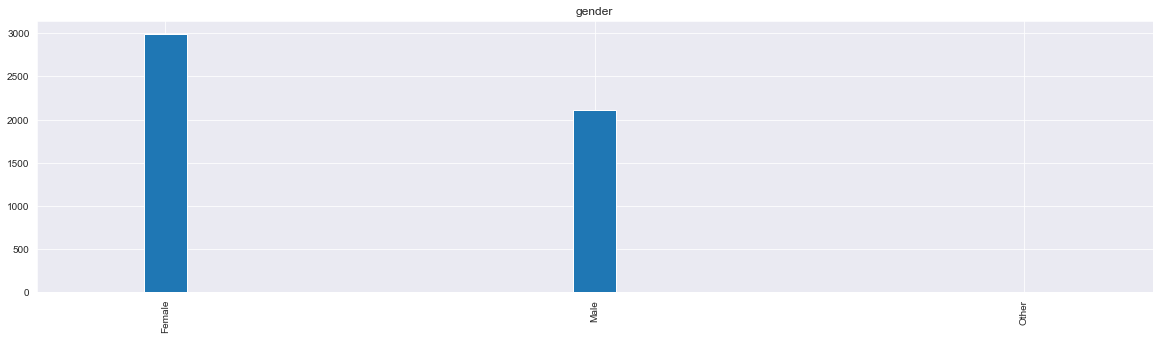

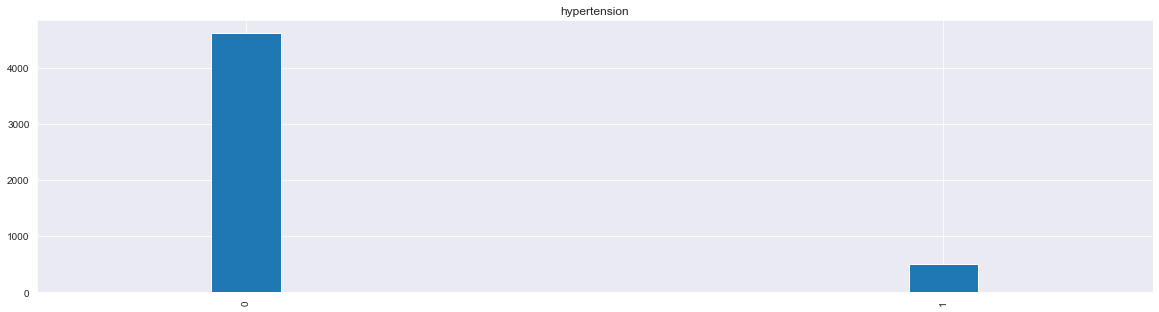

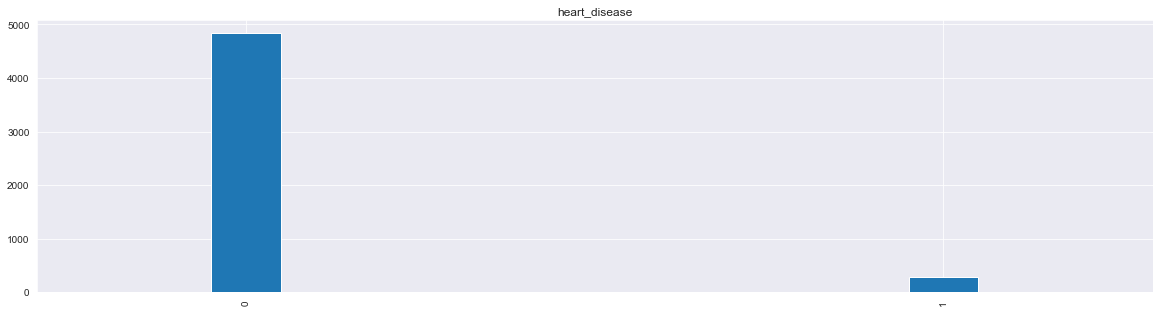

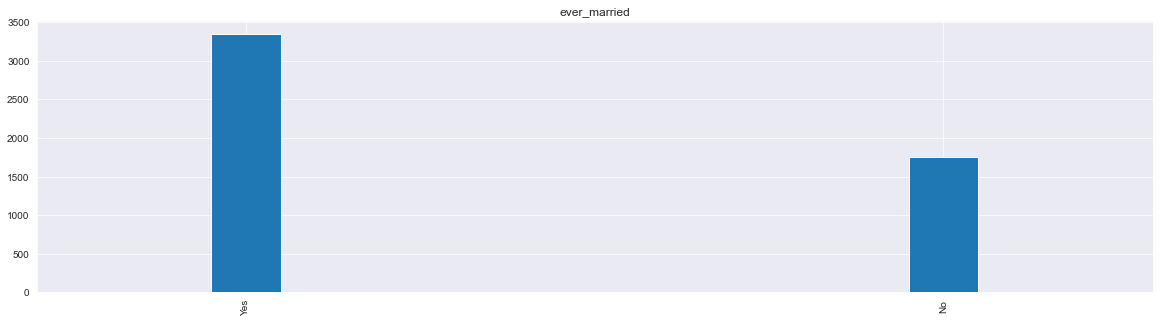

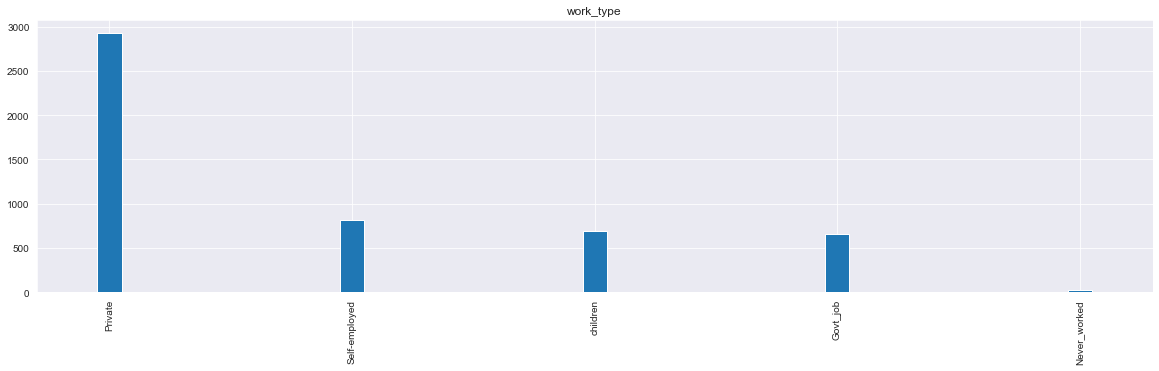

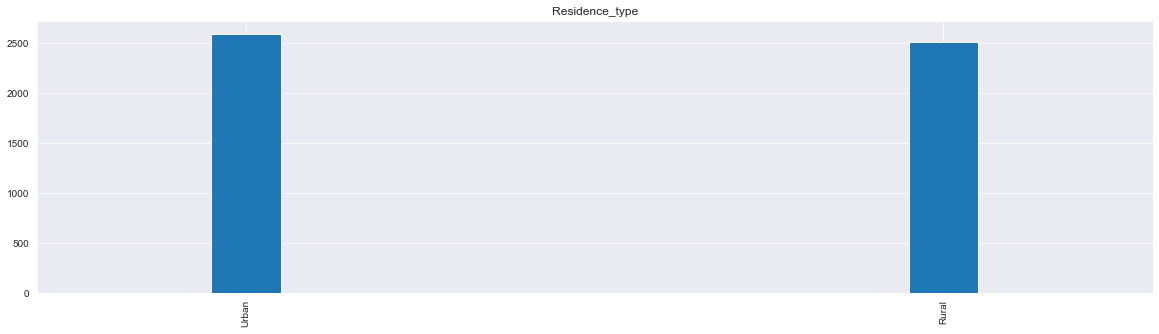

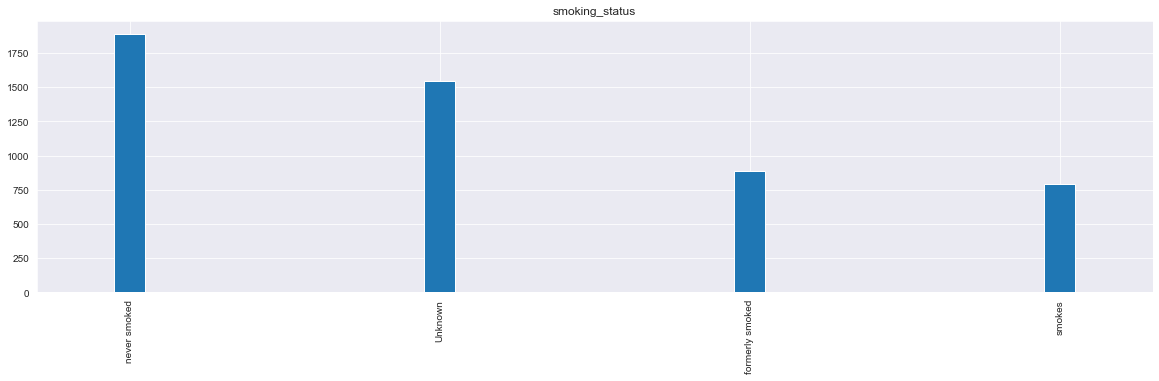

In [445]:
for item in ListofCategories:
    ((dataframe_stroke_raw[item]).value_counts()).plot(kind='bar',width=0.1)
    plt.title(item)
    plt.show()

From the above plot, it can be seen that different categorical values are not equally distributed in the dataset.
There are more people without heart disease than with heart disease.
Also, there are more people without hypertension than people with hypertension.
There are more number of people working in private jobs and more number of people who have never smoked.


# Data Cleansing

In [446]:

dataframe_stroke=dataframe_stroke_raw.drop(columns=['id'])
dataframe_stroke=dataframe_stroke.dropna()

In [447]:
dataframe_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [448]:
dataframe_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [449]:
dataframe_stroke.shape

(4909, 11)

# Insights

In [450]:
ListofBins=['age','bmi','avg_glucose_level']

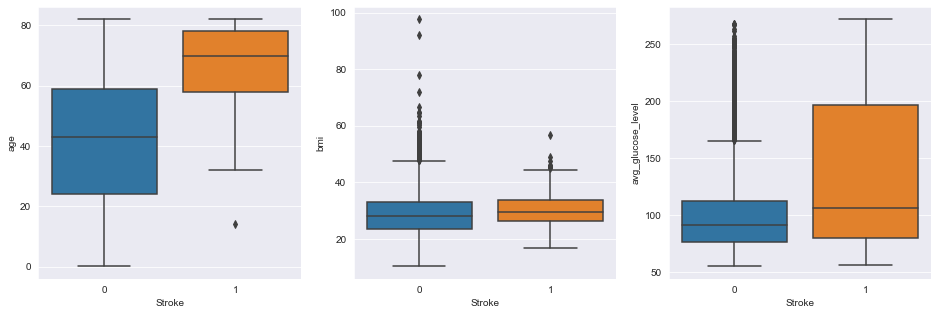

In [451]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
for i, item in enumerate(ListofBins):
    sns.boxplot(x="stroke", y=item, data=dataframe_stroke, ax=axs[i])
    axs[i].set_xlabel("Stroke")
    axs[i].set_ylabel(f"{item}")

### From the above box plots, there is a higher chance of stroke with increase in age and increase in avg glucose level

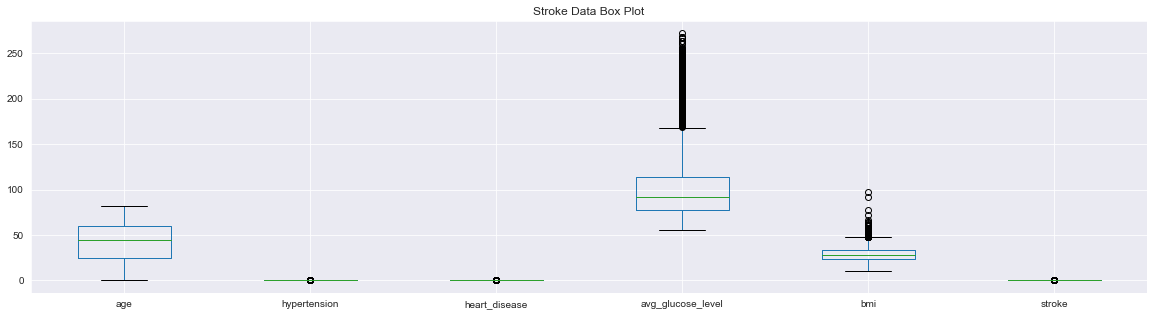

In [452]:
dataframe_stroke.plot(kind='box')
plt.title('Stroke Data Box Plot')
plt.show()

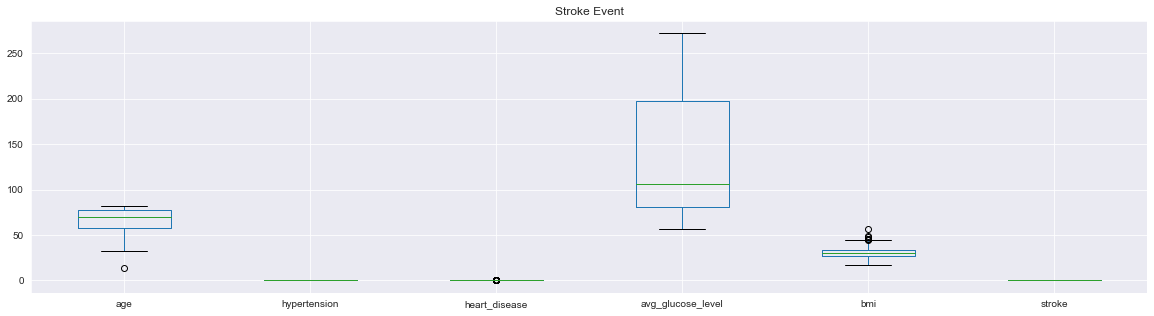

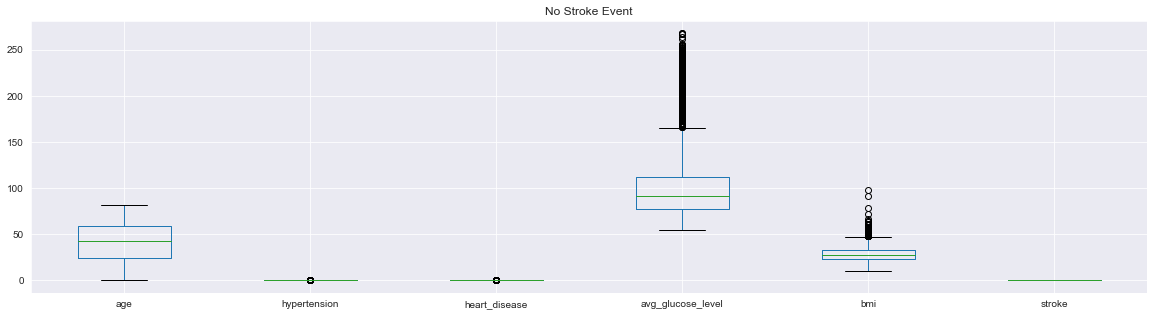

In [453]:
stroke=dataframe_stroke['stroke']==1
no_stroke=dataframe_stroke['stroke']==0
df_stroke=dataframe_stroke[stroke]
df_no_stroke=dataframe_stroke[no_stroke]
df_stroke.plot(kind='box')
plt.title('Stroke Event')
plt.show()
df_no_stroke.plot(kind='box')
plt.title('No Stroke Event')
plt.show()

In [454]:
print(df_stroke.describe())

              age  hypertension  heart_disease  avg_glucose_level         bmi  \
count  209.000000    209.000000     209.000000         209.000000  209.000000   
mean    67.712919      0.287081       0.191388         134.571388   30.471292   
std     12.402848      0.453486       0.394338          62.462047    6.329452   
min     14.000000      0.000000       0.000000          56.110000   16.900000   
25%     58.000000      0.000000       0.000000          80.430000   26.400000   
50%     70.000000      0.000000       0.000000         106.580000   29.700000   
75%     78.000000      1.000000       0.000000         196.920000   33.700000   
max     82.000000      1.000000       1.000000         271.740000   56.600000   

       stroke  
count   209.0  
mean      1.0  
std       0.0  
min       1.0  
25%       1.0  
50%       1.0  
75%       1.0  
max       1.0  


In [455]:
print(df_no_stroke.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  4700.000000   4700.000000    4700.000000        4700.000000   
mean     41.760451      0.083191       0.043191         104.003736   
std      22.268129      0.276201       0.203310          42.997798   
min       0.080000      0.000000       0.000000          55.120000   
25%      24.000000      0.000000       0.000000          76.887500   
50%      43.000000      0.000000       0.000000          91.210000   
75%      59.000000      0.000000       0.000000         112.432500   
max      82.000000      1.000000       1.000000         267.760000   

               bmi  stroke  
count  4700.000000  4700.0  
mean     28.823064     0.0  
std       7.908287     0.0  
min      10.300000     0.0  
25%      23.400000     0.0  
50%      28.000000     0.0  
75%      33.100000     0.0  
max      97.600000     0.0  


## Since, the data set contains uneven distribution of different categories of variables, it won't give a the correct picture if the number of stroke events corresponding to each categories are considered. So, the stroke events are calculated as the percentage of total number of each category in the dataset.

In [456]:
ListofCategories=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 
       'smoking_status']

In [457]:
for item in ListofCategories:
    print((dataframe_stroke[item]).value_counts())
    print((df_stroke[item]).value_counts())

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
Female    120
Male       89
Name: gender, dtype: int64
0    4458
1     451
Name: hypertension, dtype: int64
0    149
1     60
Name: hypertension, dtype: int64
0    4666
1     243
Name: heart_disease, dtype: int64
0    169
1     40
Name: heart_disease, dtype: int64
Yes    3204
No     1705
Name: ever_married, dtype: int64
Yes    186
No      23
Name: ever_married, dtype: int64
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Private          127
Self-employed     53
Govt_job          28
children           1
Name: work_type, dtype: int64
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
Urban    109
Rural    100
Name: Residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64
never smoked       84
formerly smoked    5

In [458]:
for item in ListofCategories:
   print(((df_stroke[item]).value_counts())/((dataframe_stroke[item]).value_counts())*100)

Female    4.142216
Male      4.425659
Other          NaN
Name: gender, dtype: float64
0     3.342306
1    13.303769
Name: hypertension, dtype: float64
0     3.621946
1    16.460905
Name: heart_disease, dtype: float64
Yes    5.805243
No     1.348974
Name: ever_married, dtype: float64
Govt_job         4.444444
Never_worked          NaN
Private          4.517965
Self-employed    6.838710
children         0.149031
Name: work_type, dtype: float64
Urban    4.37751
Rural    4.13394
Name: Residence_type, dtype: float64
Unknown            1.955496
formerly smoked    6.810036
never smoked       4.535637
smokes             5.291723
Name: smoking_status, dtype: float64


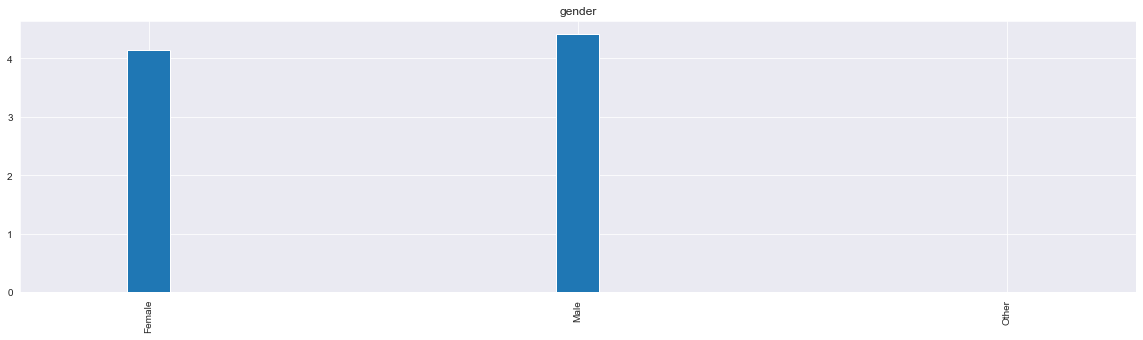

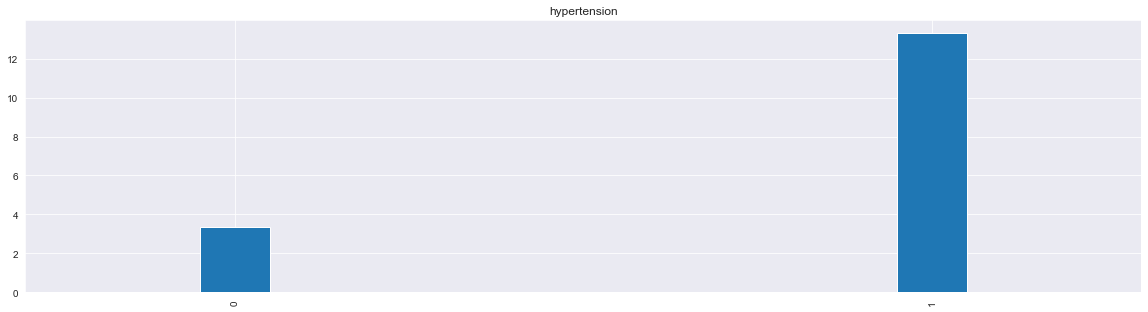

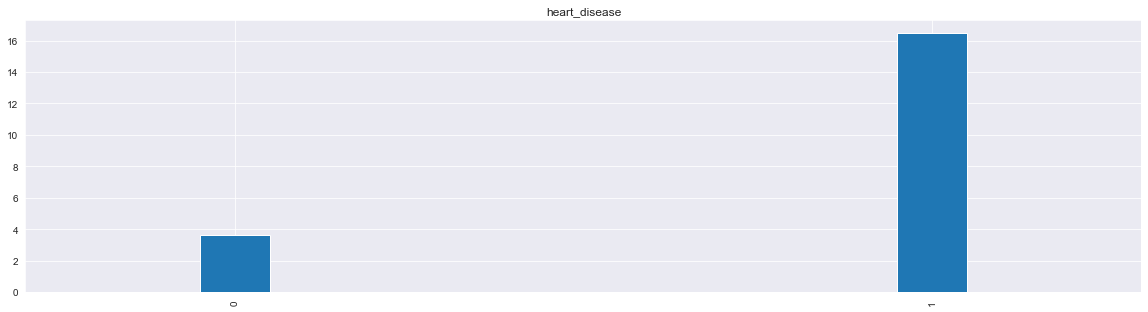

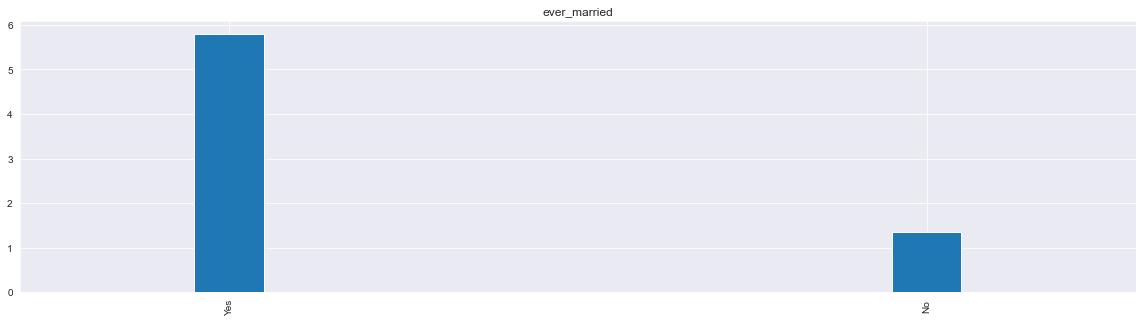

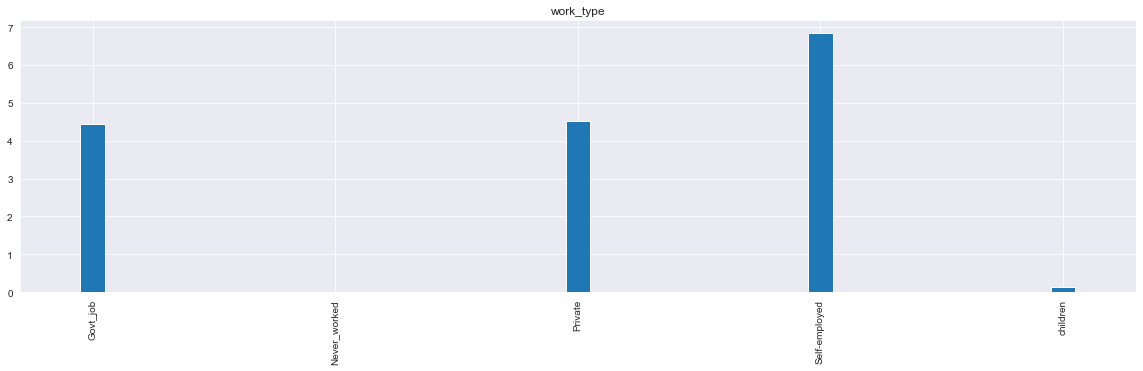

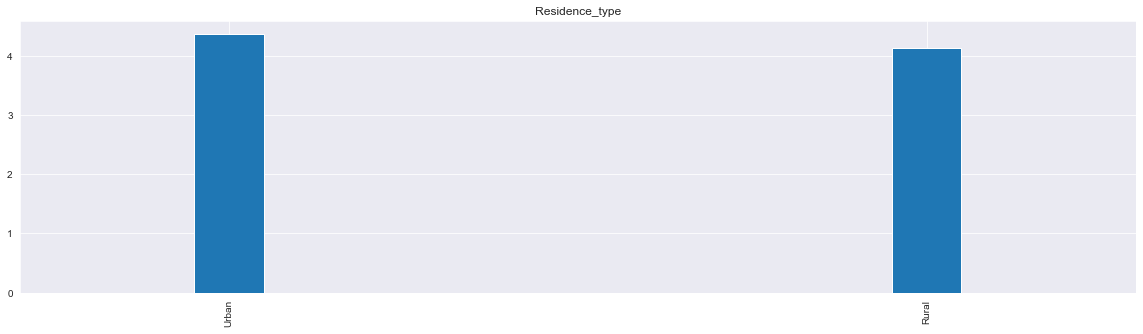

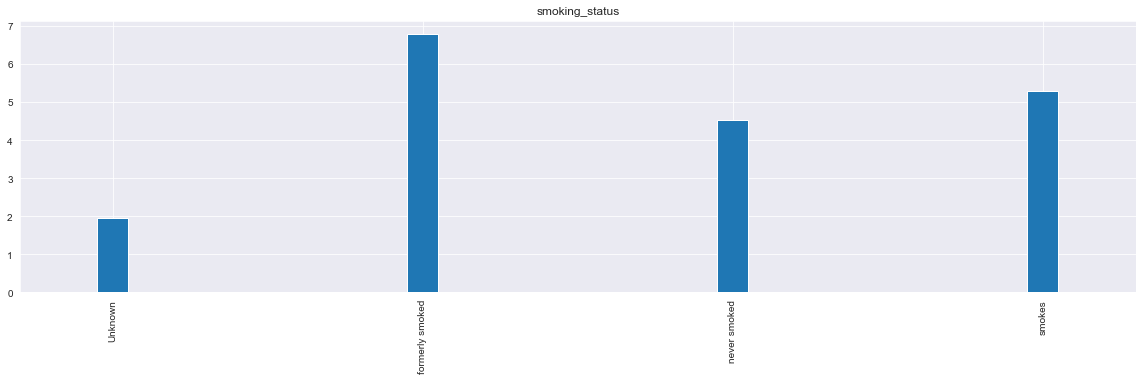

In [459]:
for item in ListofCategories:
    (((df_stroke[item]).value_counts())/((dataframe_stroke[item]).value_counts())*100).plot(kind='bar',width=0.1)
    plt.title(item)
    plt.show()
    

The above plots give the following insights:
1.There is slightly higher percentage of males with stroke than females.
2.There is almost 6 times more chance for people with hypertension to have stroke than people without hypertension
3.There are more than 4 times chance for people with heart disease to get stroke than people without heart disease.
4.There is a higher chance for people in the urban area to get stroke than people living in rural area.
5.As per the above plots, married people gets stroke more than never married people, and people who have never worked have a lesser chance of stroke. But, we have already seen that hugher age has a good association with occurrence of stroke. As the variables marital status and whether or not worked are also associated with age, this is to be analysed further.

In [460]:
dataframe_stroke['age'].describe()


count    4909.000000
mean       42.865374
std        22.555115
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

In [461]:
df_stroke['age'].describe()

count    209.000000
mean      67.712919
std       12.402848
min       14.000000
25%       58.000000
50%       70.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

In [462]:
pd.cut(dataframe_stroke['age'], bins=np.linspace(0, 90, 10))

0       (60.0, 70.0]
2       (70.0, 80.0]
3       (40.0, 50.0]
4       (70.0, 80.0]
5       (80.0, 90.0]
            ...     
5104    (10.0, 20.0]
5106    (80.0, 90.0]
5107    (30.0, 40.0]
5108    (50.0, 60.0]
5109    (40.0, 50.0]
Name: age, Length: 4909, dtype: category
Categories (9, interval[float64]): [(0.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0]]

In [463]:
pd.cut(df_stroke['age'],bins=np.linspace(0,90,10))

0      (60.0, 70.0]
2      (70.0, 80.0]
3      (40.0, 50.0]
4      (70.0, 80.0]
5      (80.0, 90.0]
           ...     
243    (60.0, 70.0]
244    (50.0, 60.0]
245    (10.0, 20.0]
246    (70.0, 80.0]
248    (70.0, 80.0]
Name: age, Length: 209, dtype: category
Categories (9, interval[float64]): [(0.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0]]

In [464]:
df_stroke['age'].value_counts(bins=np.linspace(0,90,10), sort=False)

(-0.001, 10.0]     0
(10.0, 20.0]       1
(20.0, 30.0]       0
(30.0, 40.0]       5
(40.0, 50.0]      15
(50.0, 60.0]      42
(60.0, 70.0]      42
(70.0, 80.0]      81
(80.0, 90.0]      23
Name: age, dtype: int64

In [465]:
dataframe_stroke['age'].value_counts(bins=np.linspace(0,90,10), sort=False)

(-0.001, 10.0]    493
(10.0, 20.0]      507
(20.0, 30.0]      536
(30.0, 40.0]      648
(40.0, 50.0]      716
(50.0, 60.0]      792
(60.0, 70.0]      564
(70.0, 80.0]      538
(80.0, 90.0]      115
Name: age, dtype: int64

In [466]:
100*(df_stroke['age'].value_counts(bins=np.linspace(0,90,10), sort=False))/(dataframe_stroke['age'].value_counts(bins=np.linspace(0,90,10), sort=False))

(-0.001, 10.0]     0.000000
(10.0, 20.0]       0.197239
(20.0, 30.0]       0.000000
(30.0, 40.0]       0.771605
(40.0, 50.0]       2.094972
(50.0, 60.0]       5.303030
(60.0, 70.0]       7.446809
(70.0, 80.0]      15.055762
(80.0, 90.0]      20.000000
Name: age, dtype: float64

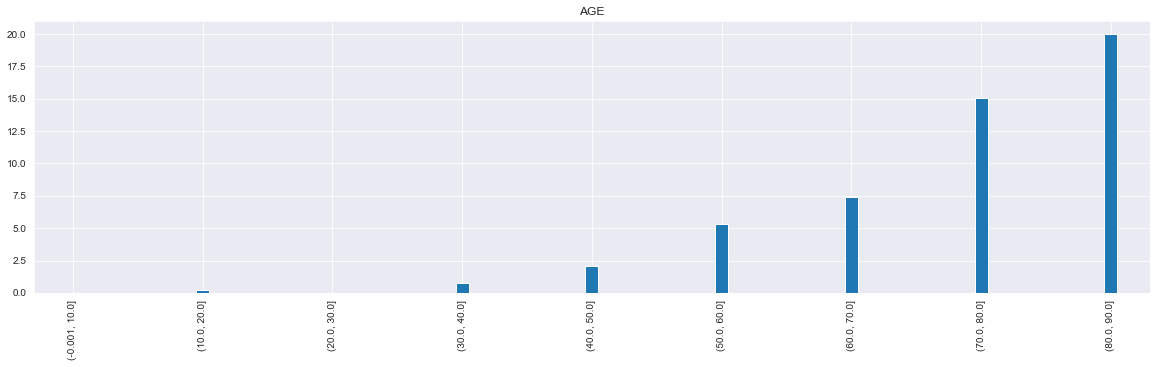

In [467]:
(100*(df_stroke['age'].value_counts(bins=np.linspace(0,90,10), sort=False))/(dataframe_stroke['age'].value_counts(bins=np.linspace(0,90,10), sort=False))).plot(kind='bar',width=0.1)
plt.title('AGE')
plt.show()

## The above chart shows the percentage of stroke events in different age groups. It can be seen that the chance of stroke increases with higher age

In [468]:
dataframe_stroke['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [469]:
df_stroke['bmi'].describe()

count    209.000000
mean      30.471292
std        6.329452
min       16.900000
25%       26.400000
50%       29.700000
75%       33.700000
max       56.600000
Name: bmi, dtype: float64

In [470]:
df_stroke['bmi'].value_counts(bins=np.linspace(10,100,10), sort=False)

(9.999, 20.0]      3
(20.0, 30.0]     110
(30.0, 40.0]      78
(40.0, 50.0]      17
(50.0, 60.0]       1
(60.0, 70.0]       0
(70.0, 80.0]       0
(80.0, 90.0]       0
(90.0, 100.0]      0
Name: bmi, dtype: int64

In [471]:
dataframe_stroke['bmi'].value_counts(bins=np.linspace(10,100,10), sort=False) 

(9.999, 20.0]     537
(20.0, 30.0]     2479
(30.0, 40.0]     1485
(40.0, 50.0]      329
(50.0, 60.0]       66
(60.0, 70.0]        9
(70.0, 80.0]        2
(80.0, 90.0]        0
(90.0, 100.0]       2
Name: bmi, dtype: int64

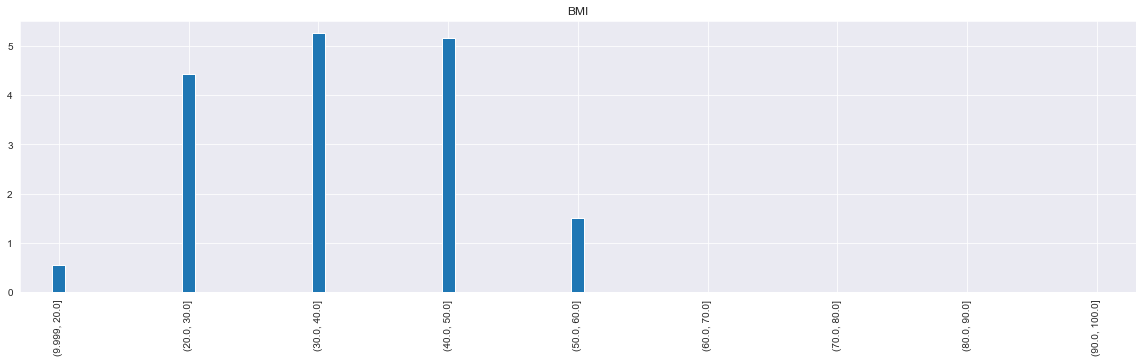

In [472]:
(100*(df_stroke['bmi'].value_counts(bins=np.linspace(10,100,10), sort=False))/(dataframe_stroke['bmi'].value_counts(bins=np.linspace(10,100,10), sort=False))).plot(kind='bar',width=0.1)
plt.title('BMI')
plt.show()

In [473]:
dataframe_stroke['avg_glucose_level'].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [474]:
df_stroke['avg_glucose_level'].describe()

count    209.000000
mean     134.571388
std       62.462047
min       56.110000
25%       80.430000
50%      106.580000
75%      196.920000
max      271.740000
Name: avg_glucose_level, dtype: float64

In [475]:
df_stroke['avg_glucose_level'].value_counts(bins=np.linspace(50,280,10), sort=False)

(49.999, 75.556]      38
(75.556, 101.111]     56
(101.111, 126.667]    28
(126.667, 152.222]    11
(152.222, 177.778]     6
(177.778, 203.333]    23
(203.333, 228.889]    30
(228.889, 254.444]    14
(254.444, 280.0]       3
Name: avg_glucose_level, dtype: int64

In [476]:
dataframe_stroke['avg_glucose_level'].value_counts(bins=np.linspace(50,280,10), sort=False)

(49.999, 75.556]      1123
(75.556, 101.111]     1969
(101.111, 126.667]     913
(126.667, 152.222]     253
(152.222, 177.778]     118
(177.778, 203.333]     177
(203.333, 228.889]     240
(228.889, 254.444]     102
(254.444, 280.0]        14
Name: avg_glucose_level, dtype: int64

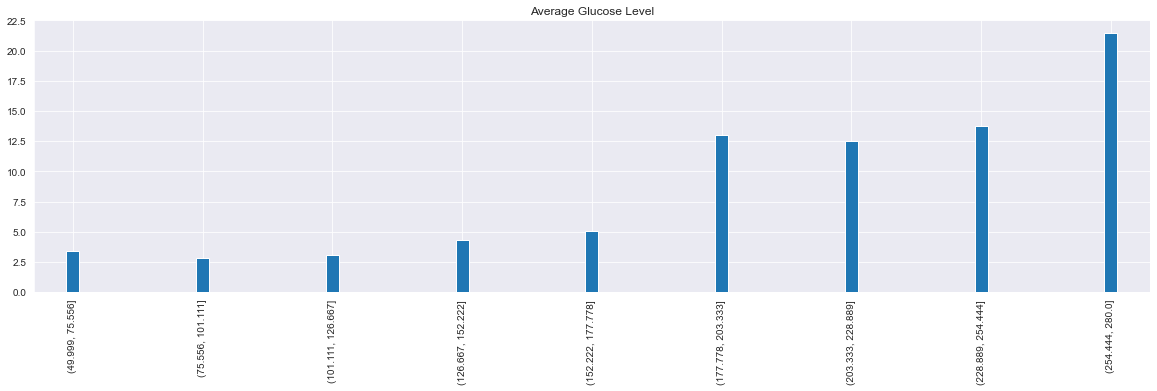

In [477]:
(100*(df_stroke['avg_glucose_level'].value_counts(bins=np.linspace(50,280,10), sort=False))/(dataframe_stroke['avg_glucose_level'].value_counts(bins=np.linspace(50,280,10), sort=False))).plot(kind='bar',width=0.1)
plt.title('Average Glucose Level')
plt.show()

## From the above plots, the chance of stroke increases with increase in average glucose level and age. But, chance of stroke doesn't seem to have any association with the bmi value.

In [479]:
(100*(df_stroke['age'].value_counts(bins=np.linspace(0,90,10),hue='ever_married', sort=False))/(dataframe_stroke['age'].value_counts(bins=np.linspace(0,90,10), hue='ever_married',sort=False))).plot(kind='bar',width=0.1)
plt.title('AGE')
plt.show()

TypeError: value_counts() got an unexpected keyword argument 'hue'

In [482]:
df_stroke_age=df_stroke

In [483]:
df_stroke_age['age_bins']=pd.cut(df_stroke['age'],bins=np.linspace(0,90,10))

<ipython-input-483-afd118dc01e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke_age['age_bins']=pd.cut(df_stroke['age'],bins=np.linspace(0,90,10))


In [484]:
df_stroke_age.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(60.0, 70.0]"
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(70.0, 80.0]"
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(40.0, 50.0]"
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(70.0, 80.0]"
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"(80.0, 90.0]"


In [485]:
dataframe_stroke_age=dataframe_stroke

In [486]:
dataframe_stroke_age['age_bins']=pd.cut(dataframe_stroke['age'],bins=np.linspace(0,90,10))

In [487]:
dataframe_stroke_age.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(60.0, 70.0]"
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(70.0, 80.0]"
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(40.0, 50.0]"
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(70.0, 80.0]"
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"(80.0, 90.0]"


<AxesSubplot:xlabel='age_bins', ylabel='count'>

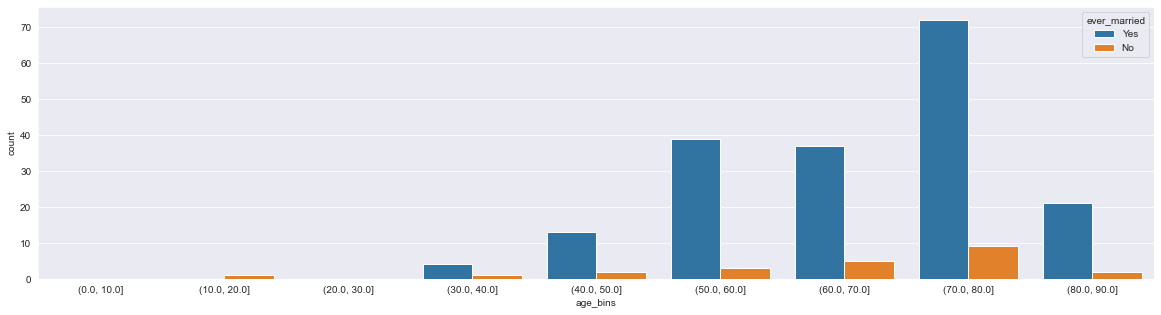

In [488]:
sns.countplot(data=df_stroke_age,x='age_bins',hue='ever_married')

<AxesSubplot:xlabel='age_bins', ylabel='count'>

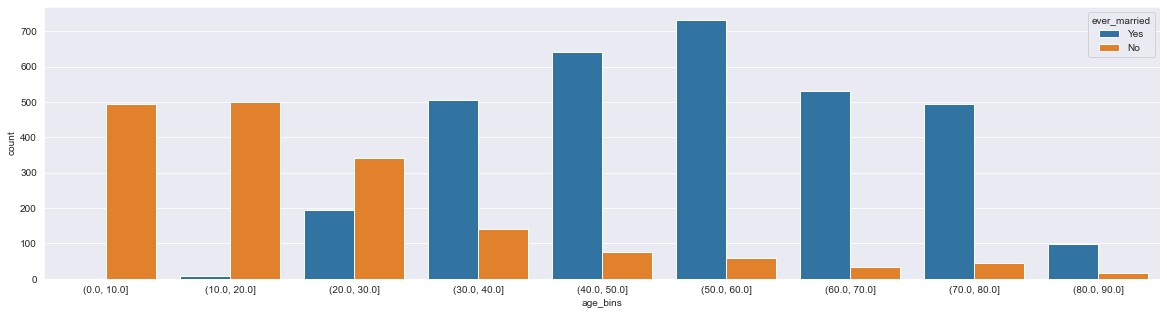

In [489]:
sns.countplot(data=dataframe_stroke_age,x='age_bins',hue='ever_married')

As the age increases, percentage of married people increases. 

In [490]:
df_stroke_age.value_counts(['age_bins','ever_married'])

age_bins      ever_married
(70.0, 80.0]  Yes             72
(50.0, 60.0]  Yes             39
(60.0, 70.0]  Yes             37
(80.0, 90.0]  Yes             21
(40.0, 50.0]  Yes             13
(70.0, 80.0]  No               9
(60.0, 70.0]  No               5
(30.0, 40.0]  Yes              4
(50.0, 60.0]  No               3
(80.0, 90.0]  No               2
(40.0, 50.0]  No               2
(30.0, 40.0]  No               1
(10.0, 20.0]  No               1
dtype: int64

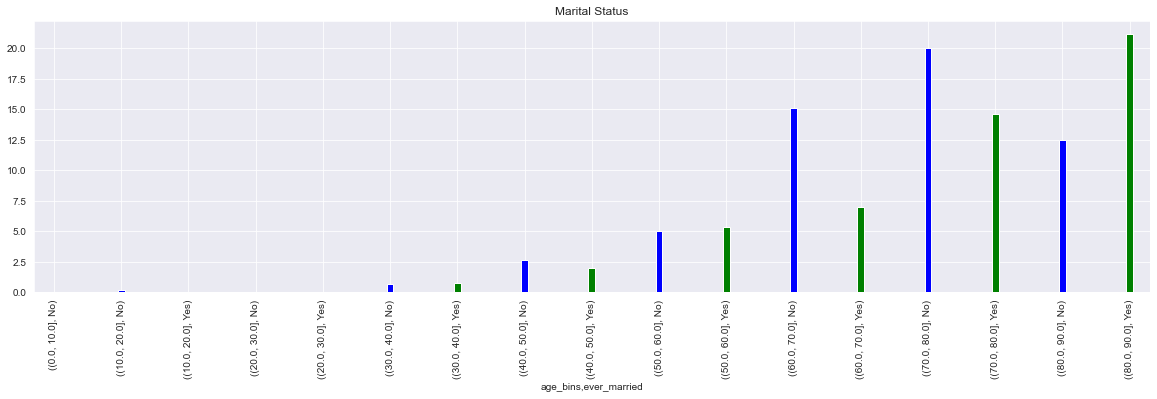

In [491]:
((df_stroke_age.value_counts(['age_bins','ever_married']))/(dataframe_stroke_age.value_counts(['age_bins','ever_married']))*100).plot(kind='bar',width=0.1,color=['green','blue'])
plt.title('Marital Status')
plt.show()

## From the above plot, marital status does not have any clear relationship with the chance of stroke. In some age groups there are more number of married people with stroke, and in some others there are more number of unmarried people with stroke. The percentage of married people increases with age, and so does the chance of stroke. 

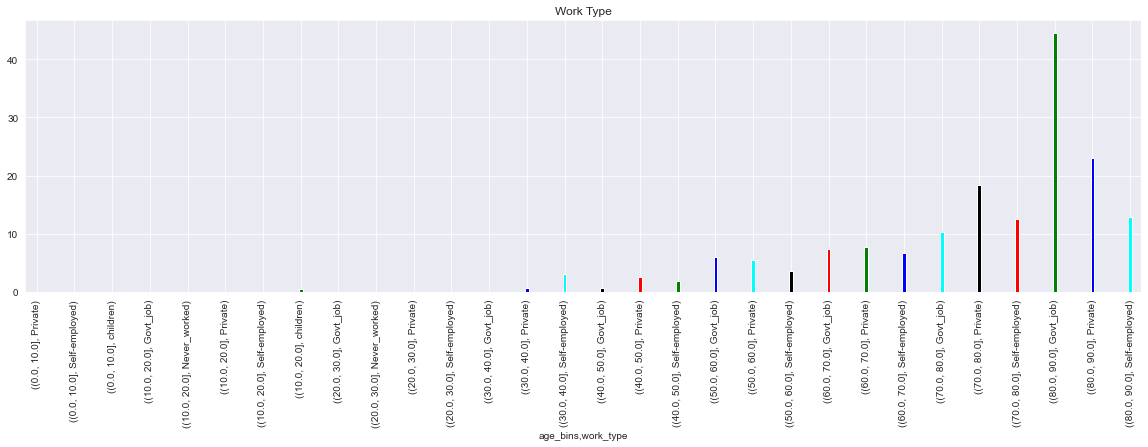

In [492]:
((df_stroke_age.value_counts(['age_bins','work_type']))/(dataframe_stroke_age.value_counts(['age_bins','work_type']))*100).plot(kind='bar',width=0.1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Work Type')
plt.show()

## When an age wise split is considered, there is not much relationship between the type of work and the chance of stroke.

# Building models to predict the chance of stroke

# Linear Regression with one hot encoding

In [493]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 

In [494]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = dataframe_stroke['gender']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Male' 'Male' 'Female' ... 'Female' 'Male' 'Female']
[1 1 0 ... 0 1 0]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
['Male']


In [495]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
model_df=dataframe_stroke.copy()
model_df['gender'] = le.fit_transform(dataframe_stroke['gender'])
model_df['ever_married'] = le.fit_transform(dataframe_stroke['ever_married'])
model_df['work_type'] = le.fit_transform(dataframe_stroke['work_type'])
model_df['Residence_type'] = le.fit_transform(dataframe_stroke['Residence_type'])
model_df['smoking_status'] = le.fit_transform(dataframe_stroke['smoking_status'])

model_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,"(60.0, 70.0]"
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,"(70.0, 80.0]"
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,"(40.0, 50.0]"
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,"(70.0, 80.0]"
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,"(80.0, 90.0]"


In [496]:
dataframe_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(60.0, 70.0]"
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(70.0, 80.0]"
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(40.0, 50.0]"
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(70.0, 80.0]"
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"(80.0, 90.0]"


In [497]:
stroke_data_correlated=model_df.corr()
print(stroke_data_correlated)

                     gender       age  hypertension  heart_disease  \
gender             1.000000 -0.030738      0.021578       0.082712   
age               -0.030738  1.000000      0.274425       0.257123   
hypertension       0.021578  0.274425      1.000000       0.115991   
heart_disease      0.082712  0.257123      0.115991       1.000000   
ever_married      -0.037237  0.680782      0.162406       0.111245   
work_type          0.058560 -0.366987     -0.052750      -0.030373   
Residence_type    -0.005014  0.010948     -0.001074      -0.002362   
avg_glucose_level  0.053664  0.235838      0.180543       0.154525   
bmi               -0.026678  0.333398      0.167811       0.041357   
smoking_status    -0.060004  0.275515      0.110808       0.055236   
stroke             0.006757  0.232331      0.142515       0.137938   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.037237   0.058560       -0.005014           0.053664 

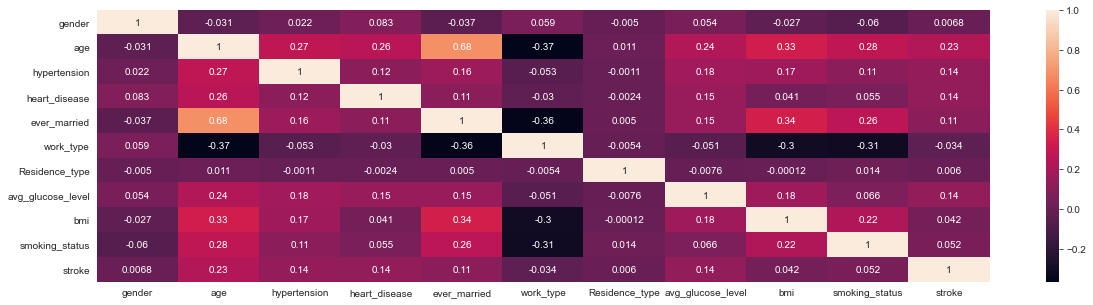

In [498]:
sns.heatmap(stroke_data_correlated, annot = True)
plt.show()

In [543]:
independant_variables=model_df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]

In [544]:
dependant_variable=model_df[['stroke']]

In [545]:
independant_variables=sm.add_constant(independant_variables)
independant_variables.head()

,const,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1.0,1,80.0,0,1,1,2,0,105.92,32.5,2
3,1.0,0,49.0,0,0,1,2,1,171.23,34.4,3
4,1.0,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1.0,1,81.0,0,0,1,2,1,186.21,29.0,1


In [546]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independant_variables, dependant_variable, test_size=0.33, random_state=1)
print('X-train')
print(X_train.info())
print('y_train')
print(y_train.info())
print('X-test')
print(X_test.info())
print('y-test')
print(y_test.info())

X-train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3289 entries, 3771 to 275
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              3289 non-null   float64
 1   gender             3289 non-null   int32  
 2   age                3289 non-null   float64
 3   hypertension       3289 non-null   int64  
 4   heart_disease      3289 non-null   int64  
 5   ever_married       3289 non-null   int32  
 6   work_type          3289 non-null   int32  
 7   Residence_type     3289 non-null   int32  
 8   avg_glucose_level  3289 non-null   float64
 9   bmi                3289 non-null   float64
 10  smoking_status     3289 non-null   int32  
dtypes: float64(4), int32(5), int64(2)
memory usage: 244.1 KB
None
y_train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3289 entries, 3771 to 275
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   s

In [547]:
regression_model_stroke=sm.OLS(y_train,X_train).fit()
regression_model_stroke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     26.22
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.61e-48
Time:                        19:40:36   Log-Likelihood:                 722.36
No. Observations:                3289   AIC:                            -1423.
Df Residuals:                    3278   BIC:                            -1356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0666      0.020     -3.280      0.001      -0.106      -0.027
gender                0.0002      0.007      0.022      0.982      -0.013       0.014
age                   0.0021      0.000      9.318      0.000       0.002       0.003
hypertension          0.0346      0.012      2.804      0.005       0.010       0.059
heart_disease         0.0581      0.016      3.545      0.000       0.026       0.090
ever_married         -0.0242      0.010     -2.421      0.016      -0.044      -0.005
work_type             0.0031      0.004      0.874      0.382      -0.004       0.010
Residence_type        0.0071      0.007      1.049      0.294      -0.006       0.020
avg_glucose_level     0.0004      8e-05      5.239      0.000       0.000       0.001
bmi                  -0.0009      0.000     -1.853      0.064      -0.002    5.32e-05
smoking_status        0.0007      0.003      0.190      0.849      -0.006       0.007
==============================================================================
Omnibus:                     2688.809   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43919.453
Skew:                           4.028   Prob(JB):                         0.00
Kurtosis:                      18.987   Cond. No.                         765.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [548]:
parameters=(regression_model_stroke.params).sort_values()
print(parameters)

const               -0.066636
ever_married        -0.024214
bmi                 -0.000918
gender               0.000155
avg_glucose_level    0.000419
smoking_status       0.000654
age                  0.002092
work_type            0.003094
Residence_type       0.007125
hypertension         0.034587
heart_disease        0.058083
dtype: float64


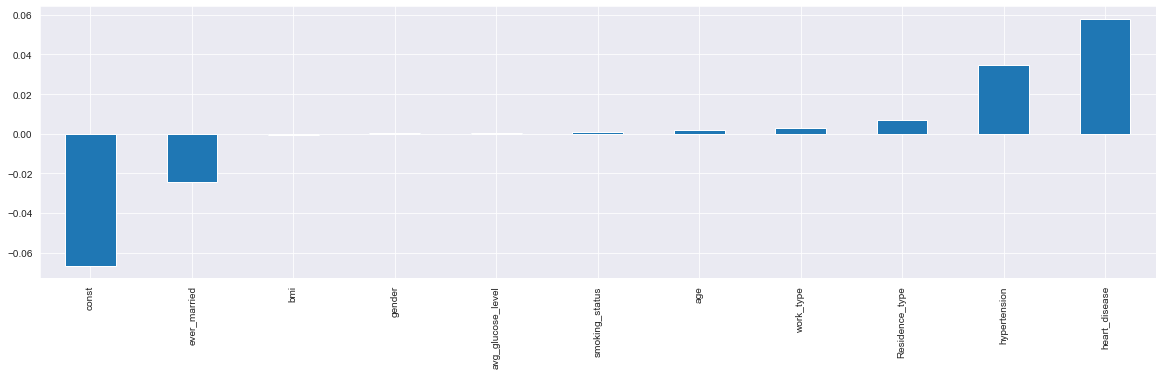

In [549]:
parameters.plot(kind='bar')
plt.show() 

In [550]:
prediction=regression_model_stroke.predict(X_test)

In [551]:
import math

### Creating a function to calculate RMSE value

In [552]:
def rmse_calc(y_test,y_predict):
    residue=y_test.sub(y_predict,axis=0)
    residue_square=np.square(residue)
    RMSE=math.sqrt(residue_square.mean())
    return(RMSE)
    

In [553]:
residue=y_test.sub(prediction,axis=0)
residue_square=np.square(residue)
print(y_test.head())
print(prediction.head())
print(residue.head())
print(residue_square.head())
print(residue_square.mean())
RMSE=math.sqrt(residue_square.mean())
print(RMSE)
print(rmse_calc(y_test,prediction))


      stroke
2648       0
3441       0
4935       0
1316       0
3271       0
2648    0.019818
3441    0.062170
4935   -0.012837
1316    0.021577
3271   -0.006263
dtype: float64
        stroke
2648 -0.019818
3441 -0.062170
4935  0.012837
1316 -0.021577
3271  0.006263
        stroke
2648  0.000393
3441  0.003865
4935  0.000165
1316  0.000466
3271  0.000039
stroke    0.037457
dtype: float64
0.19353885234856139
0.19353885234856139


# Linear Regression with one hot encoding using only the variables found influential from the previous analysis

In [554]:
model_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

   const  gender   age  hypertension  heart_disease  Residence_type  \
0    1.0       1  67.0             0              1               1   
2    1.0       1  80.0             0              1               0   
3    1.0       0  49.0             0              0               1   
4    1.0       0  79.0             1              0               0   
5    1.0       1  81.0             0              0               1   

   avg_glucose_level  smoking_status  
0             228.69               1  
2             105.92               2  
3             171.23               3  
4             174.12               2  
5             186.21               1  
                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     41.08
Date:                Fr

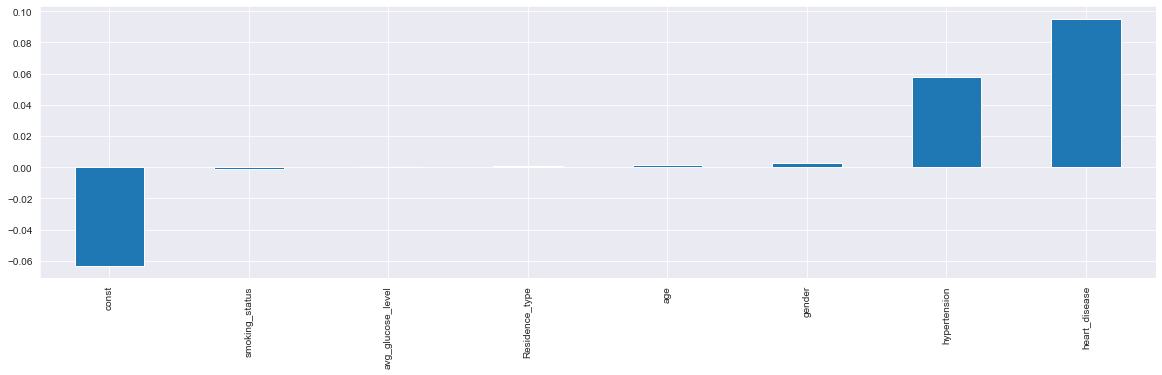

In [555]:
independant_variables=model_df[['gender', 'age', 'hypertension', 'heart_disease',
        'Residence_type', 'avg_glucose_level',
       'smoking_status']]
dependant_variable=model_df[['stroke']]
independant_variables=sm.add_constant(independant_variables)
X_train, X_test, y_train, y_test = train_test_split(independant_variables, dependant_variable, test_size=0.3, random_state=2)

print(independant_variables.head())
regression_model_stroke=sm.OLS(y_train,X_train).fit()
print(regression_model_stroke.summary())
parameters=(regression_model_stroke.params).sort_values()
print(parameters)
parameters.plot(kind='bar')
plt.show()

In [556]:


prediction=regression_model_stroke.predict(X_test)

In [557]:
import math

In [559]:

print(rmse_calc(y_test,prediction))


0.19814914032463454


# Linear Regression with categorical values replaced with average of stroke rate

In [560]:
model_df_rate=dataframe_stroke.copy()
convert_category={}
for item in ListofCategories:
    #for category in dataframe_stroke[item].unique():
        
    
    res = df_stroke[item].value_counts()* 100 / dataframe_stroke[item].value_counts()
    convert_category[item] = res.to_dict()
convert_category   

{'gender': {'Female': 4.142216085605799,
  'Male': 4.4256588761810045,
  'Other': nan},
 'hypertension': {0: 3.342305966801256, 1: 13.303769401330378},
 'heart_disease': {0: 3.621945992284612, 1: 16.46090534979424},
 'ever_married': {'Yes': 5.805243445692884, 'No': 1.348973607038123},
 'work_type': {'Govt_job': 4.444444444444445,
  'Never_worked': nan,
  'Private': 4.517965136961935,
  'Self-employed': 6.838709677419355,
  'children': 0.14903129657228018},
 'Residence_type': {'Urban': 4.377510040160643, 'Rural': 4.133939644481191},
 'smoking_status': {'Unknown': 1.9554956169925826,
  'formerly smoked': 6.810035842293907,
  'never smoked': 4.535637149028077,
  'smokes': 5.291723202170964}}

In [561]:
model_df_rate = model_df_rate.replace(convert_category)
model_df_rate.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
0,4.425659,67.0,3.342306,16.460905,5.805243,4.517965,4.37751,228.69,36.6,6.810036,1,"(60.0, 70.0]"
2,4.425659,80.0,3.342306,16.460905,5.805243,4.517965,4.13394,105.92,32.5,4.535637,1,"(70.0, 80.0]"
3,4.142216,49.0,3.342306,3.621946,5.805243,4.517965,4.37751,171.23,34.4,5.291723,1,"(40.0, 50.0]"
4,4.142216,79.0,13.303769,3.621946,5.805243,6.838710,4.13394,174.12,24.0,4.535637,1,"(70.0, 80.0]"
5,4.425659,81.0,3.342306,3.621946,5.805243,4.517965,4.37751,186.21,29.0,6.810036,1,"(80.0, 90.0]"


In [562]:
model_df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4908 non-null   float64 
 1   age                4909 non-null   float64 
 2   hypertension       4909 non-null   float64 
 3   heart_disease      4909 non-null   float64 
 4   ever_married       4909 non-null   float64 
 5   work_type          4887 non-null   float64 
 6   Residence_type     4909 non-null   float64 
 7   avg_glucose_level  4909 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     4909 non-null   float64 
 10  stroke             4909 non-null   int64   
 11  age_bins           4909 non-null   category
dtypes: category(1), float64(10), int64(1)
memory usage: 625.8 KB


In [563]:
model_df_rate=model_df_rate.dropna()

In [564]:
model_df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4886 non-null   float64 
 1   age                4886 non-null   float64 
 2   hypertension       4886 non-null   float64 
 3   heart_disease      4886 non-null   float64 
 4   ever_married       4886 non-null   float64 
 5   work_type          4886 non-null   float64 
 6   Residence_type     4886 non-null   float64 
 7   avg_glucose_level  4886 non-null   float64 
 8   bmi                4886 non-null   float64 
 9   smoking_status     4886 non-null   float64 
 10  stroke             4886 non-null   int64   
 11  age_bins           4886 non-null   category
dtypes: category(1), float64(10), int64(1)
memory usage: 463.6 KB


                     gender       age  hypertension  heart_disease  \
gender             1.000000 -0.029392      0.022132       0.083348   
age               -0.029392  1.000000      0.273632       0.256735   
hypertension       0.022132  0.273632      1.000000       0.115691   
heart_disease      0.083348  0.256735      0.115691       1.000000   
ever_married      -0.035482  0.678463      0.161106       0.110275   
work_type         -0.084939  0.667911      0.154244       0.109131   
Residence_type    -0.003412  0.012646     -0.000642      -0.002055   
avg_glucose_level  0.052887  0.235893      0.180535       0.154534   
bmi               -0.025637  0.332859      0.167589       0.040984   
smoking_status    -0.017425  0.404947      0.135067       0.095185   
stroke             0.007095  0.231950      0.142248       0.137743   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.035482  -0.084939       -0.003412           0.052887 

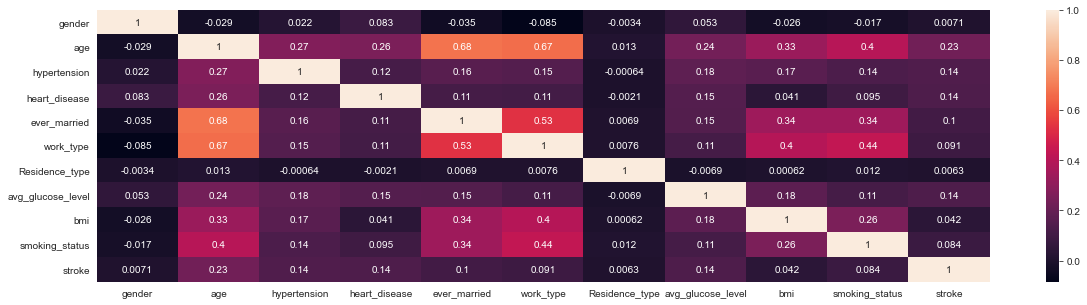

In [565]:
stroke_data_correlated=model_df_rate.corr()
print(stroke_data_correlated)
sns.heatmap(stroke_data_correlated, annot = True)
plt.show()

   const    gender   age  hypertension  heart_disease  Residence_type  \
0    1.0  4.425659  67.0      3.342306      16.460905         4.37751   
2    1.0  4.425659  80.0      3.342306      16.460905         4.13394   
3    1.0  4.142216  49.0      3.342306       3.621946         4.37751   
4    1.0  4.142216  79.0     13.303769       3.621946         4.13394   
5    1.0  4.425659  81.0      3.342306       3.621946         4.37751   

   avg_glucose_level  smoking_status   bmi  ever_married  work_type  
0             228.69        6.810036  36.6      5.805243   4.517965  
2             105.92        4.535637  32.5      5.805243   4.517965  
3             171.23        5.291723  34.4      5.805243   4.517965  
4             174.12        4.535637  24.0      5.805243   6.838710  
5             186.21        6.810036  29.0      5.805243   4.517965  
                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:            

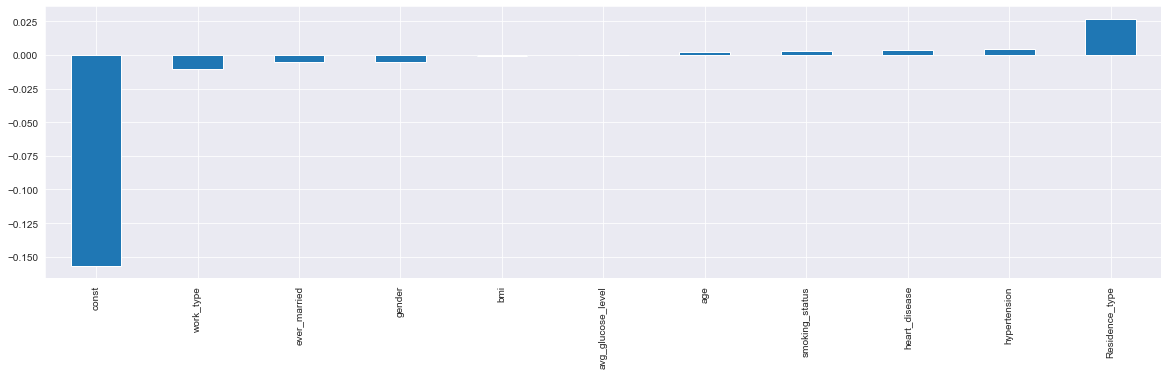

In [566]:
independant_variables=model_df_rate[['gender', 'age', 'hypertension', 'heart_disease',
        'Residence_type', 'avg_glucose_level',
       'smoking_status','bmi','ever_married','work_type']]
dependant_variable=model_df_rate[['stroke']]
independant_variables=sm.add_constant(independant_variables)
X_train, X_test, y_train, y_test = train_test_split(independant_variables, dependant_variable, test_size=0.3, random_state=1)

print(independant_variables.head())
regression_model_stroke=sm.OLS(y_train,X_train).fit()
print(regression_model_stroke.summary())
parameters=(regression_model_stroke.params).sort_values()
print(parameters)
parameters.plot(kind='bar')
plt.show()

In [568]:
prediction=regression_model_stroke.predict(X_test)

print(rmse_calc(y_test,prediction))

0.19593624256877992


### The linear regression models gave an RMSE value of 0.193,0.216 and 0.196 with One hot encoding(with all the variables and with only the variables found influential) and with categorical values replaced with stroke rates respectively. So the models with all the variables included gave better results in terms of RMSE with both one hot encoding and by replacing the categorical values with stroke rates.

# Logistic Regression with categorical variables replaced with average stroke rate

In [569]:
import statsmodels.api as sm

In [570]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\akm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\akm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [571]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred=model.predict(X_test)
arg_test = {'y_true':y_test, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

[[1402    0]
 [  64    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1402
           1       0.00      0.00      0.00        64

    accuracy                           0.96      1466
   macro avg       0.48      0.50      0.49      1466
weighted avg       0.91      0.96      0.94      1466



C:\Users\akm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [572]:
y_test.info

<bound method DataFrame.info of       stroke
3920       0
1317       0
3242       0
857        0
3494       0
...      ...
792        0
2797       0
1711       0
3202       0
3514       0

[1466 rows x 1 columns]>

In [573]:
print(accuracy_score(y_test, model.predict(X_test)).round(4))

0.9563


In [574]:
y_test.describe()

,stroke
count,1466.000000
mean,0.043656
std,0.204399
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [578]:

print(rmse_calc(y_test,y_pred))


0.20894067906222807


# Logistic regression with one hot encoding

In [579]:
independant_variables=model_df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
dependant_variable=model_df[['stroke']]

In [580]:
independant_variables=model_df[['gender', 'age', 'hypertension', 'heart_disease',
        'Residence_type', 'avg_glucose_level',
       'smoking_status','bmi','ever_married','work_type']]
dependant_variable=model_df[['stroke']]
independant_variables=sm.add_constant(independant_variables)
X_train, X_test, y_train, y_test = train_test_split(independant_variables, dependant_variable, test_size=0.3, random_state=2)

print(independant_variables.head())

   const  gender   age  hypertension  heart_disease  Residence_type  \
0    1.0       1  67.0             0              1               1   
2    1.0       1  80.0             0              1               0   
3    1.0       0  49.0             0              0               1   
4    1.0       0  79.0             1              0               0   
5    1.0       1  81.0             0              0               1   

   avg_glucose_level  smoking_status   bmi  ever_married  work_type  
0             228.69               1  36.6             1          2  
2             105.92               2  32.5             1          2  
3             171.23               3  34.4             1          2  
4             174.12               2  24.0             1          3  
5             186.21               1  29.0             1          2  


In [581]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\akm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\akm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [582]:
y_pred=model.predict(X_test)
arg_test = {'y_true':y_test, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

[[1408    1]
 [  64    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        64

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.93      1473



In [583]:
print(accuracy_score(y_test, model.predict(X_test)).round(4))

0.9559


In [585]:

print(rmse_calc(y_test,y_pred))

0.21006577704537094


### The logistic regression models gave an RMSE value of 0.210 and 0.208 with One hot encoding and with categorical values replaced with stroke rates respectively. The logistic regression models have shown slightly higher RMSE values compared to the linear regression models.